### Python 3 / Jupyter install instructions

For those having trouble getting Jupyter notebook up and running I recommend installing the Anaconda Python 3 distribution - which you can [find here](https://www.anaconda.com/download/).  The basic distribution includes a number of useful libraries - including numpy, matplotlib, and Jupyter itself - and makes it easier to install additional libraries as well.  Just make sure you download the Python 3.6 distribution if you do this.

You will also need the automatic differentiator [autograd](https://github.com/HIPS/autograd) - you can install this package via your terminal by typing 

``pip install autograd``

#### <span style="color:#a50e3e;">Example 1. </span> Getting to know autograd

Time to add in a powerful gradient calculator that works well with the numpy library.  [Click here to view the github repo](https://github.com/HIPS/autograd) - download its contents to your machine. 

When using autograd for automatic differentiation, be sure to employ autograd's version of numpy - so that the automatic differentiator can correctly parse your input functions.

In [2]:
# import statement for autograd wrapped numpy
import autograd.numpy as np   

There are two standard ways of defining functions in Python.  First the the standard named Python function like below

In [3]:
# a named Python function
def sin(w):
    return np.sin(w)

WIth this declaration Python now understands 'sin' as its own function, so it can be called as follows.

In [4]:
# how to use the 'sin' function
w_val = 1.0   # a test input for our 'sin' function
g_val = sin(w_val)
print (g_val)

0.841470984808


You can also create 'anonymous' functions in Python (functions unconnected to a name) by using the ``lambda`` command.  We can produce the same function using lambda as shown below.

In [5]:
# how to use 'lambda' to create an anonymous function
g = lambda w: np.sin(w)

We can then use it with a test value as shown below.

In [6]:
# how to use the 'sin' function
w_val = 1.0   # a test input for our 'sin' function
g_val = g(w_val)
print (g_val)

0.841470984808


We can visualize this function by using ``matplotlib`` assets, as shown below.  

In [7]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

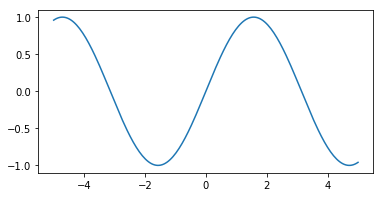

In [8]:
# create a sample of points to plot over 
w_vals = np.linspace(-5,5,200)

# evaluate the function over each of these values - one can use an explicit for-loop here instead of a list comprehension
g_vals = [g(v) for v in w_vals]

# plot
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.plot(w_vals,g_vals)
plt.show()

Using autograd we can then compute the gradient function here.  We show the proper import statement and manner of using this calculator below.Mm

In [9]:
# import statment for gradient calculator
from autograd import grad    

In [10]:
# create the gradient function of g --> nabla_g
nabla_g = grad(g)

The gradient function can be evaluated like the original - as shown in the next cell.

In [11]:
# evaluate the gradient function at a point
w_val = 1.0
nabla_g(1.0)

0.54030230586813977

Now we can plot the gradient along with the original function, which we do in the next cell.

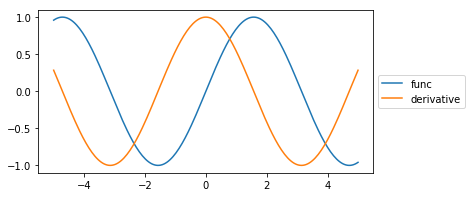

In [12]:
# create space over which to evaluate function and gradient
w_vals = np.linspace(-5,5,200)

# evaluate gradient over input range
g_vals = [g(v) for v in w_vals]
grad_vals = [nabla_g(v) for v in w_vals]

# create figure
fig, ax = plt.subplots(1, 1, figsize=(6,3))

# plot function and gradient values
ax.plot(w_vals,g_vals)
ax.plot(w_vals,grad_vals)
ax.legend(['func','derivative'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

---

#### <span style="color:#a50e3e;">Exercise 1. </span> Python class refresher

Roll up the Python functions provided for you in the previous example to make a Python class for computing and viewing single input derivatives called ``GradViewer``.  Instances should be initialized with the input function to differentiate, and the gradient function can be computed on initialization as well.

When complete you should be able to successfully run the cell below.

In [13]:
class GradViewer(object):
    w_vals = np.linspace(-5, 5, 200)
    def __init__(self, function, *args):
        self.g_vals = [function(v) for v in self.w_vals]
        self.grad_vals = [grad(function)(v) for v in self.w_vals]
 
    def plot_it(self):       
        fig, ax = plt.subplots(1, 1, figsize=(6,3))
        ax.plot(self.w_vals, self.g_vals)
        ax.plot(self.w_vals, self.grad_vals)
        ax.legend(['func','derivative'], loc='center left', bbox_to_anchor=(1, 0.5))
        return plt.show()

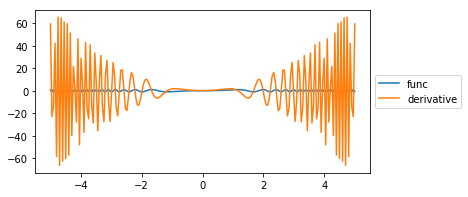

In [14]:
# test function input
def my_function(w):                 
    y = np.sin(w**3)
    return y

# create instance, inputting function on creation
test = GradViewer(my_function)

# plot this derivative and original function
test.plot_it()

Next with your derivative viewer complete - visualize the following function and its derivative using the cell above.

\begin{equation}
g(w) = \sum_{n = 0}^{10} \text{cos}(n\cdot w)
\end{equation}

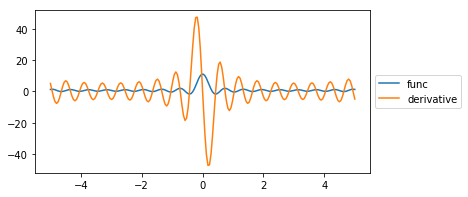

In [15]:
# define a function of the above equation
def new_function(w):
    y = 0
    for n in range(0, 11):
        y += np.cos(n*w)
    return y

test_new = GradViewer(new_function)
test_new.plot_it()

#### <span style="color:#a50e3e;">Exercise 2. </span> Python class refresher part 2

Extend the class you put together in exercise 1 into a new class called ``OrderViewer`` that can compute a higher order derivative of any desired order of an input function, and plots both.  Make a new function for this class ``compute_it`` that takes in the desired ``order`` and computes this order derivative.

When complete you should be able to successfully run the cell below.

In [16]:
class OrderViewer(object):
    w_vals = np.linspace(-5, 5, 200)
    def __init__(self, function, *args):
        self.g_vals = [function(v) for v in self.w_vals]
        self.function = function
        
    def compute_it(self, order, **kwargs):
        for n in range(order):
            if n == 0:
                temp_function = grad(self.function)
            if n > 0:
                temp_function = grad(temp_function)
        self.grad_vals = [temp_function(v) for v in self.w_vals]
        
    def plot_it(self):
        fig, ax = plt.subplots(1, 1, figsize=(6,3))
        ax.plot(self.w_vals, self.g_vals)
        ax.plot(self.w_vals, self.grad_vals)
        ax.legend(['func','derivative of order 3'], loc='center left', bbox_to_anchor=(1, 0.5))
        return plt.show()


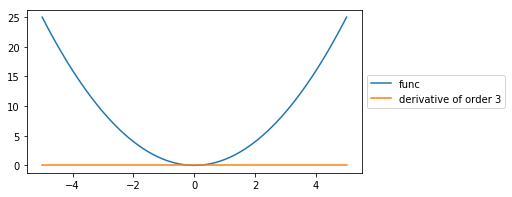

In [17]:
# test function input
def my_function(w):                 
    y = w**2
    return y

# create instance, inputting function on creation
test = OrderViewer(my_function)

# compute desired order derivative
test.compute_it(order = 3)

# plot this derivative and original function
test.plot_it()

#### <span style="color:#a50e3e;">Exercise 3. </span>  A generic gradient descent function

Adjust the gradient descent code below we saw in class to record the weights at each step of algorithm (instead of the best weights) and return the entire weight history.  Remember here the inputs are 

- g: the input function to perform gradient descent on
- alpha: the steplength parameter
- max_its: the number of gradient descent steps to take
- w: the initial point

Your version of the ``gradient_descent`` below should return a history of weights recorded at each step called ``weight_history``. 

In [18]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), 
# max_its (maximum number of iterations), w (initialization)
def gradient_descent(g, alpha, max_its, w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)
    weight_history = [] # create a list for all weights history
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        weight_history.append(w) # add all weights to the list
        
    return weight_history

Next run gradient descent to minimize the following function

\begin{equation}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right)
\end{equation}

with an initial point $w_0 = 2$, steplength parameter $\alpha = 0.1$, and 2000 iterations.  

In [19]:
# create the input function
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)   
# try other functions too!  Like g = lambda w: np.cos(2*w) , 
# g = lambda w: np.sin(5*w) + 0.1*w**2, g = lambda w: np.cos(5*w)*np.sin(w)

# run gradient descent
weight_history = gradient_descent(g = g, alpha = 0.1, max_its = 2000, w = 2.0)

Create a Python function that takes in the weight history created by gradient descent and plots the cost function history associated with this run.  A wrapper for this is provided below

In [20]:
# cost function history plotter
def cost_history(weight_history, g):
    # loop over weight history and compute associated cost function history at each step
    steps = 0
    steps_list = [] # use step counts as x-axis
    cost_list = [] # use a list of cost as y-axis
    for weight in weight_history:
        cost_list.append(g(weight)) 
        steps += 1
        steps_list.append(steps)
        
    # plot cost function history
    fig, ax = plt.subplots(1, 1, figsize=(6,3))
    ax.plot(steps_list, cost_list, '-')
    
    plt.show()

Now use ``cost_history`` above to plot your cost function history.

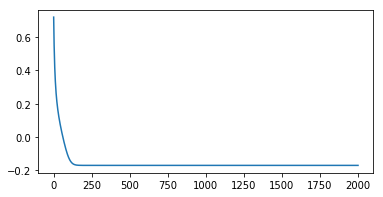

In [21]:
# use cost_history function plotter
cost_history(weight_history, g)

What is the weight associated with the smallest cost function value on your run of gradient descent?  Make sure it is close to the true solution at 

\begin{equation}
w = \frac{\sqrt[\leftroot{-2}\uproot{2}3]{\sqrt[\leftroot{-2}\uproot{2}]{2031} - 45}}{6^{\frac{2}{3}}} - \frac{1}{\sqrt[\leftroot{-2}\uproot{2}3]{6\left(\sqrt[\leftroot{-2}\uproot{2}]{2031} - 45\right)}}
\end{equation}

In [22]:
# Get the weight associated with the smallest cost function value
print(weight_history[-1])

# Compute the above true solution
true_sol = ((2031**(1/2)-45)**(1/3)) / (6**(2/3)) - (1/((6*(2031**(1/2)-45))**(1/3)))
print(true_sol)

-1.23477282505
-1.2347728250533112


#### <span style="color:#a50e3e;">Exercise 4. </span>  Apply gradient descent to minimize the Least Squares cost for linear regression on a low dimensional dataset

In this exercise you will perform gradient descent to minimize the Least Squares cost function for linear regression, using the following toy data to de-bug your work.

In [23]:
# data input
csvname = '2d_linregress_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

The first and second columns of ``data`` contain the input and output respectively.  This dataset is scatter plot in the next cell.

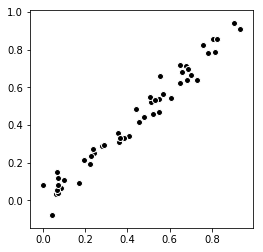

In [24]:
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
plt.show()

Since we have a gradient descent function (from e.g., the last exercise) all we need to do construct a Least Squares cost function for linear regression.  We did this in class - see below!

In [25]:
# form the input/output data vectors
x = data[:, :-1] # input data vector
y = data[:, -1] # output data vector

# least squares cost function for linear regression
def least_squares(w):
    cost = 0
    for p in range(len(y)):
        # add least squares for this datapoint
        cost += (w[0] + w[1]*x[p] - y[p])**2
    return cost

We can test ``least_squares`` by plugging in an input weight and see the returned cost function value, as illustrated below.

In [26]:
# try out least squares function
w = np.asarray([1.5, 1.5])
least_squares(w)

array([ 149.60536284])

With your Least Squares cost function defined its time to run gradient descent for a maximum of 500 iterations beginning at the point $w_0 = \begin{bmatrix} 1.5 \\ 1.5\end{bmatrix}$.  It will be up to you to find a reasonable steplength value $\alpha$ so that the best weights you can find for a run of gradient descent provide a line that fits the data well.

In [27]:
# run gradient descent
w = np.asarray([1.5, 1.5])
weight_history = gradient_descent(g=least_squares, alpha=0.01, max_its=500, w=w)

You should do this by trying a particular value of $\alpha$, running gradient descent, and plotting the associated Mean Squared Error (MSE) for every weight in your gradient descent history (remember: to compute the MSE simply divide the Least Squares cost by the number of datapoints).  You should show the histories of 3 choices for $\alpha$ you tried.  Feel free to use any of the functionality from previous exercises here.  A wrapper for your MSE calculator has been provided in the next cell.

In [28]:
# MSE history plotter
def MSE(weight_history, g):
    mse_list = []
    steps = 0
    steps_list = []
    # loop over weight history and compute the MSE at each step of gradient descent
    for p in range(len(weight_history)):
    #for w in weight_history:
        w = weight_history[p]
        mse = g(w) / len(y)
        mse_list.append(mse)
        steps += 1
        steps_list.append(steps)
        
    # plot cost function history
    fig, ax = plt.subplots(1, 1, figsize=(6,3))
    ax.plot(steps_list, mse_list, '-')
    
    plt.show()

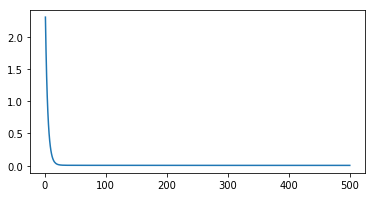

In [29]:
weight_history_1 = gradient_descent(g=least_squares, alpha=10**-3, max_its=500, w=w)
MSE(weight_history_1, least_squares)

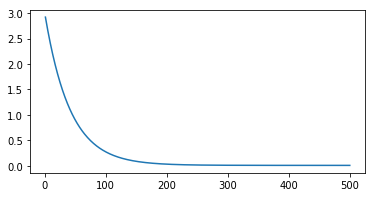

In [30]:
weight_history_2 = gradient_descent(g=least_squares, alpha=10**-4, max_its=500, w=w)
MSE(weight_history_2, least_squares)

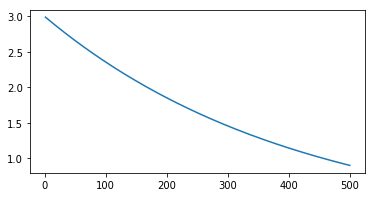

In [31]:
weight_history_3 = gradient_descent(g=least_squares, alpha=10**-5, max_its=500, w=w)
MSE(weight_history_3, least_squares)

In the next cell we plot the line associated with our initial point on top of the data - you can use this functionality to check if your weights provide a good-fitting line

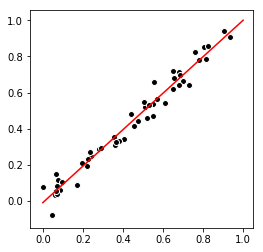

In [32]:
# our initial weights
w = np.asarray([1.5,1.5]) # obselete
optw = weight_history[-1] # the weight with minimized cost

# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0], data[:,1], color = 'k', edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(0,1,200)
y_vals = optw[0] + optw[1]*x_vals # apply new weights here
ax.plot(x_vals, y_vals, color = 'r')
plt.show()

#### <span style="color:#a50e3e;">Exercise 5. </span> Use linear regression to fit to a high dimensional dataset

The next Python cell loads in a dataset of 100 input/output pairs from a 10 dimensional dataset.  This dataset was constructed by randomly sampling a 10-dimensional hyperplane, so using linear regression we should be able to find a good linear fit to it.

In [33]:
# load in dataset
data = np.loadtxt('highdim_linregress_data.csv',delimiter = ',')

# form the input/output data vectors
x = data[:,:-1]
y = data[:,-1]

In the next cell - expand on the linear regression function provided in the previous exercise so that it can handle with $N=10$ dimensional data.

In [34]:
# least squares cost function for linear regression
def least_squares(w):
    cost = 0
    for p in range(len(y)):
        x_p = np.asarray(x[p])
        y_p = np.asarray(y[p])
        
        c_p = w[0] + np.dot(x_p.T, w[1:])
        
        cost += (c_p - y_p)**2
       
    return cost

You can test your implementation with input set of weights of all ones.  When you do this you should get the output value printed in the Python cell below.

In [35]:
# produce input and input into Least Squares cost function
w = np.ones((11,1))
print (least_squares(w))

[ 7917.97952037]


Now run gradient descent for up to 1000 iterations to minimize the Least Squares cost function on this dataset.  You can use a random set of weights as your initialization provided in the next cell.  Use the MSE printout to determine a good value of $\alpha$ where you reach an MSE value of 1 or smaller.

In [36]:
# run gradient descent
w = np.random.randn(np.shape(x)[1]+1, 1)
weight_history = gradient_descent(g = least_squares, alpha=10**-3.8, max_its=100, w = w)

With $\alpha$ chosen well you should be able to reach this threshold even after just 100 iterations, as shown below.

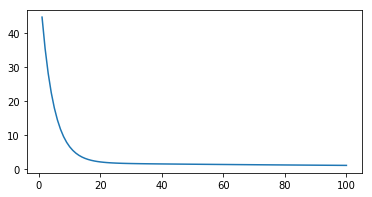

In [37]:
# use cost_history plotter
MSE(weight_history, least_squares)